# Exploratory data analysis (EDA)
Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques. And there are four types EDA, these are univariate non-graphical, multivariate non- graphical, univariate graphical, and multivariate graphical.

## Importing the relevant libraries

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import warnings
warnings.filterwarnings('ignore')

In [3]:
#we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')
import dvc.api

### Importing scripts & modules 

In [2]:
from utility import ReadData
from  Preprocessing import dataPreprocess
from logger import App_Logger
from data_info import DataInfo
import plotfunction

### Initializing logging functionality

In [4]:
logger = App_Logger("EDA_Logs.log").get_app_logger()

### Loading the data

In [5]:
train = "../data/train.csv"
test = "../data/test.csv"
store = "../data/store.csv"
sample= "../data/sample_submission.csv"

In [6]:
# the class has utility function we are going to use
helper = ReadData()

In [7]:
# we use our helper function to read csv data
df_train = helper.read_csv(train)
df_test = helper.read_csv(test)
df_store = helper.read_csv(store)
df_sample = helper.read_csv(sample)

>> file read as csv
>> file read as csv
>> file read as csv
>> file read as csv


### DVC Data get by version 

In [20]:
# def get_data(tag, 
#             path='data/train.csv', 
#             repo ='C:/Users/euelf/Desktop/10_AC_CHALLENGES/Week_3/Rossmann_Pharmaceuticals'
#             ):
#     rev = tag
#     data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
#     df = pd.read_csv(data_url)
#     return df

# Inspecting the data

## 1. Train data

In [8]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
#Checking info
df_trains = DataInfo(df_train)

In [10]:
# shape
df_trains.shape_df()

Dataframe contains 1017209 rows and 9 columns


In [11]:
#satat
df_trains.describe_stat()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [13]:
# info
df_trains.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None


In [14]:
# null percentage
df_trains.null_percentage()

Dataframe contains null values of 0.0% out of the given dataset


In [15]:
# null counts
df_trains.get_count_null()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


## 2. Test data

In [18]:
# head
df_test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [19]:
#initializing info class 
df_tests = DataInfo(df_test)

In [20]:
## checking shape
df_tests.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
None


In [21]:
# checking null
df_tests.get_count_null()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [24]:
#shape
df_tests.shape_df()

Dataframe contains 41088 rows and 8 columns


## 3. Store data

In [25]:
df_store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [26]:
#initializing
df_stores = DataInfo(df_store)

In [27]:
# shape
df_stores.shape_df()

Dataframe contains 1115 rows and 10 columns


In [29]:
# checking against null value
df_stores.get_count_null()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [30]:
# info
df_tests.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
None


## 4. Sample_submission data

In [31]:
# checking using head()
df_sample.head(2)

,Id,Sales
0,1,0
1,2,0


In [32]:
# initializing 
df_samples = DataInfo(df_sample)

In [34]:
# info shape
df_samples.shape_df()

Dataframe contains 41088 rows and 2 columns


In [35]:
# checking inof
df_samples.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB
None


In [36]:
# checking null
df_samples.get_count_null()

Id       0
Sales    0
dtype: int64


## Field Ddescriptions 

__Id__ - an Id that represents a (Store, Date) duple within the test set

__Store__ - a unique Id for each store

__Sales__ - the turnover for any given day (this is what you are predicting)

__Customers__ - the number of customers on a given day

__Open__ - an indicator for whether the store was open: 0 = closed, 1 = open

__StateHoliday__ - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

__SchoolHoliday__ - indicates if the (Store, Date) was affected by the closure of public schools

__StoreType__ - differentiates between 4 different store models: a, b, c, d

__Assortment__ - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here

__CompetitionDistance__ - distance in meters to the nearest competitor store

__CompetitionOpenSince[Month/Year]__ - gives the approximate year and month of the time the nearest competitor was opened

__Promo__ - indicates whether a store is running a promo on that day

__Promo2__ - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

__Promo2Since[Year/Week]__ - describes the year and calendar week when the store started participating in Promo2

__PromoInterval__ - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


# Merging 'train.csv' and 'store.csv'

## Both dataset have common column 'store' 
## We use that column to merge store into train dataset

In [37]:
train = pd.read_csv('../data/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("../data/store.csv", 
                    low_memory = False)

train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['Dates']=train.apply(lambda x:'%s-%s-%s' % (x['Year'],x['Month'],x['Day']),axis=1)
train['Dates']=pd.to_datetime(train['Dates'])

train_store = pd.merge(train, store, how = 'inner', on = 'Store')

#data_frame = pd.read_csv("train.csv")
train = pd.read_csv('../data/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("../data/store.csv", 
                    low_memory = False)



In [38]:
# checking 
train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


# Data wrangling begins here..

 Descriptive statistics are very useful for initial exploration of the variables
 By default, only descriptives for the numerical variables are shown
 To include the categorical ones, you should specify this with an argument
 Note that categorical variables don't have some types of numerical descriptives
 and numerical variables don't have some types of categorical descriptives

In [40]:
#Checkinig the missing values
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
Dates                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

__Competition Distance__

Before deciding how to treat this,we know there are infinite ways of filling missing values.
The most common and simplistic approach is to fill it with either the mean or the median of this variable.

In [42]:
# checking null
train_store[pd.isnull(train_store.CompetitionDistance)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
263244,291,5,10052,973,1,1,0,1,2015,7,...,2015-07-31,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263245,291,4,9030,883,1,1,0,1,2015,7,...,2015-07-30,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263246,291,3,8204,814,1,1,0,1,2015,7,...,2015-07-29,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263247,291,2,10374,943,1,1,0,1,2015,7,...,2015-07-28,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263248,291,1,11692,1086,1,1,0,1,2015,7,...,2015-07-27,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN


In [43]:
# droping 
df_store_check_distribution=train_store.drop(train_store[pd.isnull(train_store.CompetitionDistance)].index)
df_store_check_distribution.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


{'Mean': 5430.085652302903,
 'Median': 2330.0,
 'Standard Dev': 7715.319897995119}

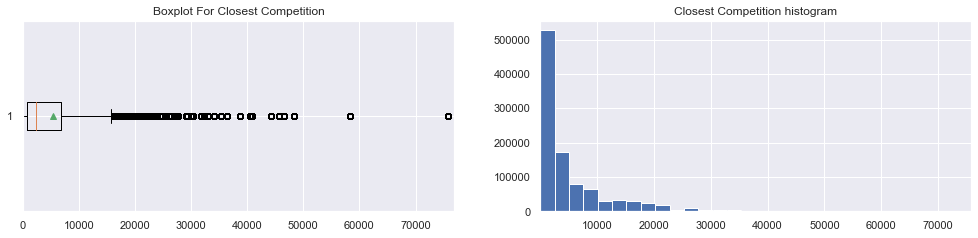

In [44]:
# metrics 
df_store_check_distribution=train_store.drop(train_store[pd.isnull(train_store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(train_store.CompetitionDistance),"Median":np.nanmedian(train_store.CompetitionDistance),"Standard Dev":np.nanstd(train_store.CompetitionDistance)}


We see a highly right skewed distribution for this variable with a significant difference between the mean and the median. This being caused by the amount of disperness in the data with a standard deviation of 7659, higher than the mean and the median.

**What do we do then?**

It is realistically better to input the median value to the Nan stores then the mean since the mean is biased by those outliers.

In [45]:
train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace = True)

__CompetitionOpenSinceMonth and CompetitionOpenSinceYear__

Since we have no information whatsoever on those missing values and no accurate way of filling those values.
So those fields are going to be assigned to 0 .

In [47]:
# filling with 0
train_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
train_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

__Promo2SinceWeek, Promo2SinceYear and PromoInterval__ 

This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores.
Having no promotion means those fields have to be 0 as well since they are linked to Promo2.


In [48]:
# asignning 0
train_store.Promo2SinceWeek.fillna(0,inplace=True)
train_store.Promo2SinceYear.fillna(0,inplace=True)
train_store.PromoInterval.fillna(0,inplace=True)

**StateHoliday**

In [50]:
# filling with 0
train_store.StateHoliday.fillna(0,inplace=True)

In [52]:
#  checking null in the train_score datasets
train_storeInfo = DataInfo(train_store)
train_storeInfo.null_percentage()

Dataframe contains null values of 0.0% out of the given dataset


In [54]:
# statistical description
train_storeInfo.describe_stat()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


## Reading the description report 

### Sales

The __minimum sale__ is 0

The __maximum sale__ is 41551.00

25% of sale is below 3727.000

50% of sale is below 5744.000

75% of sale is below 7856.000

### Customers

The __minimum customer__ is 0

The __maximum customer__ is 7388

25% of customer is below 405

50% of customer is below 609

75% of customer is below 837

In [55]:
# copy
clean_trainScore_df = train_store.copy()

## Distribution 

### Sales Distribution

Text(0.5, 1.0, 'Sales Distribution')

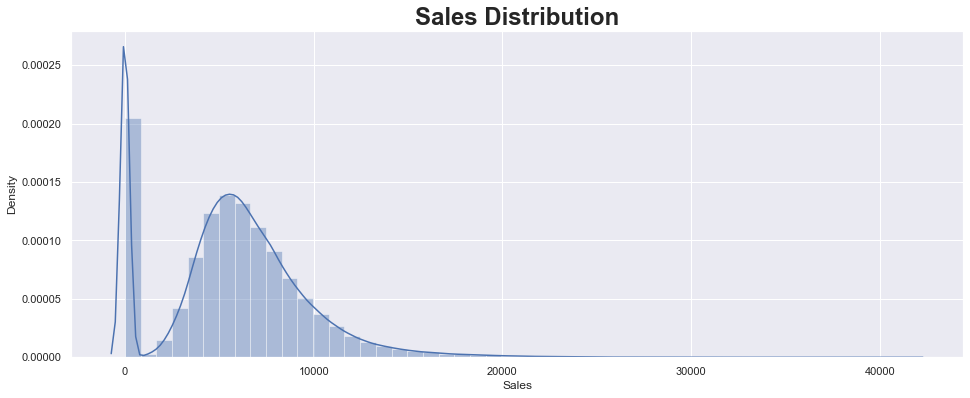

In [56]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
plt.figure(figsize=(16, 6))
sns.distplot(clean_trainScore_df['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

### Customers Distribution

Text(0.5, 1.0, 'Customers Distribution')

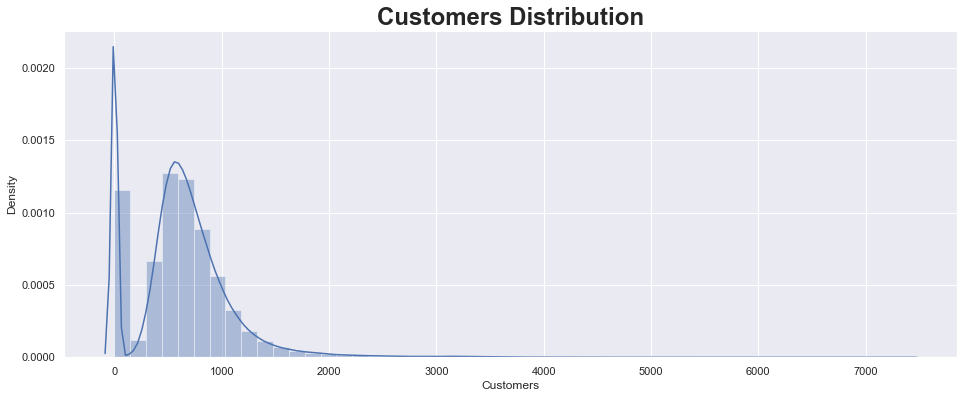

In [57]:
plt.figure(figsize=(16, 6))
sns.distplot(clean_trainScore_df['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

#### As it is observed from the above figuers, some outliers are shown in both sales and customers distribuiton

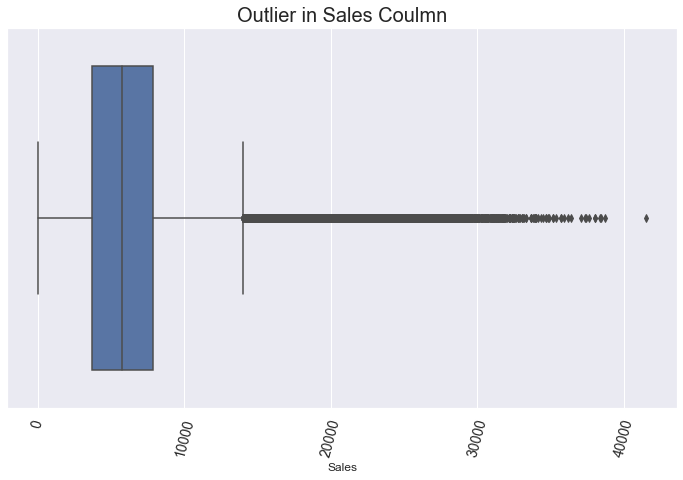

In [59]:
# checking using box plot
plotfunction.plot_box(clean_trainScore_df, 'Sales','Outlier in Sales Coulmn')

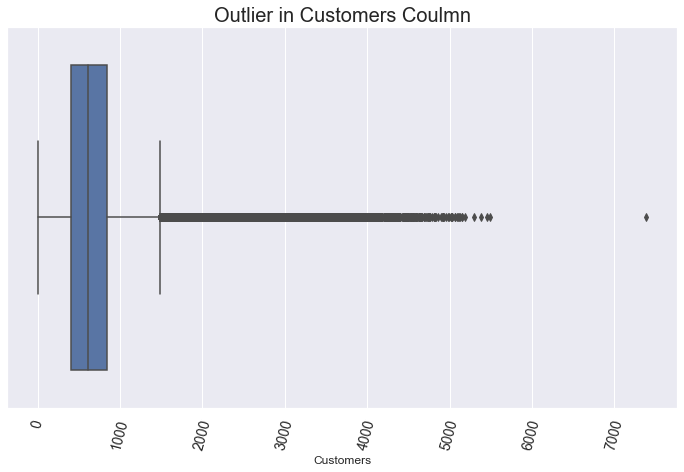

In [60]:
plotfunction.plot_box(clean_trainScore_df, 'Customers','Outlier in Customers Coulmn')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

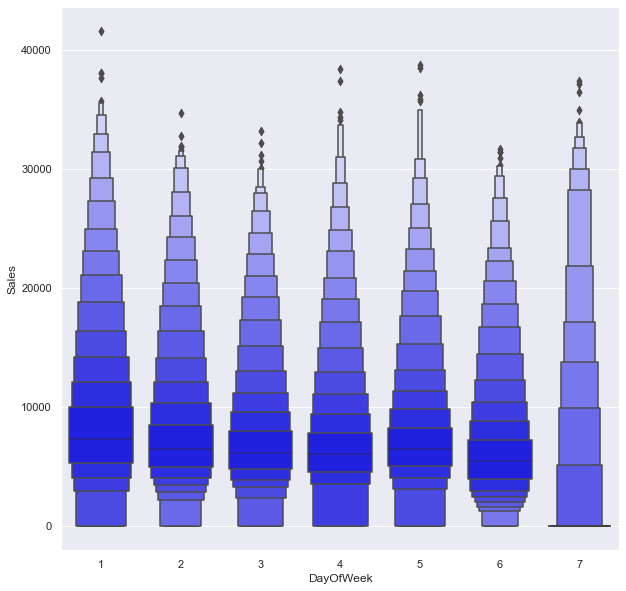

In [61]:
plt.figure(figsize=(10,10))
sns.boxenplot(data=clean_trainScore_df,scale="linear",x="DayOfWeek",y="Sales",color="Blue")

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

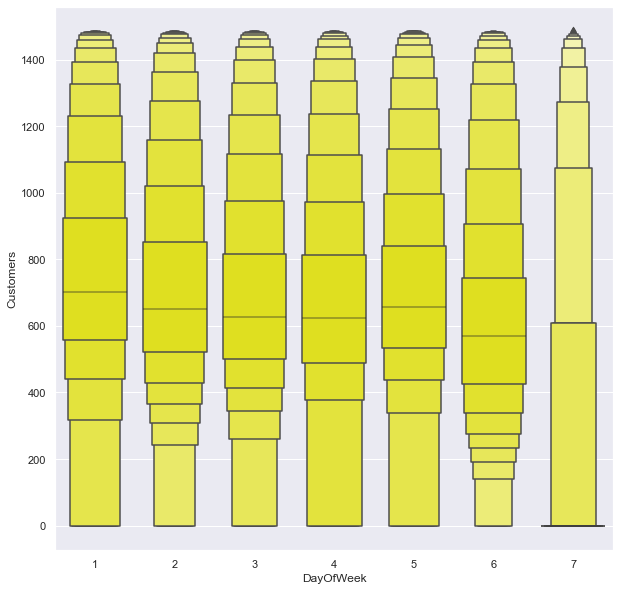

In [66]:
# box boxenplot
plt.figure(figsize=(10,10))
sns.boxenplot(y="Customers", x="DayOfWeek",data=clean_trainScore_df, scale="linear",color="Yellow")

**The data shows outliers, this can be caused due to Holiday or  promotion effect. the outliers need to be handled**

In [64]:
# replacing the outliers with median value
dataPreprocess.replace_outlier_with_median(clean_trainScore_df,'Customers' ) 

In [65]:
dataPreprocess.replace_outlier_with_median(clean_trainScore_df,'Sales' ) 

# Visual Inspection 

**DayOfWeek, Open vs Closed distribution**

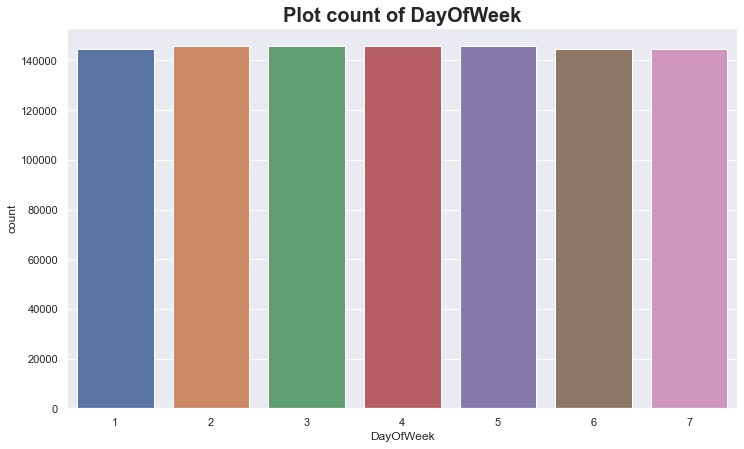

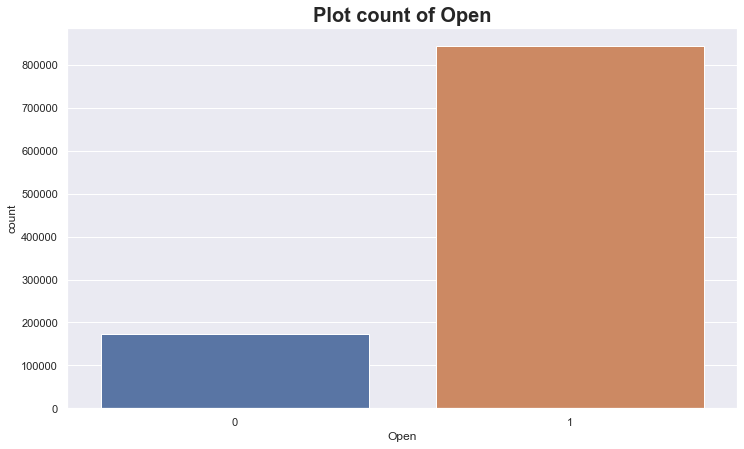

In [67]:
#ploting distribution using plot_count method
plotfunction.plot_count(clean_trainScore_df,'DayOfWeek')
plotfunction.plot_count(clean_trainScore_df, 'Open')

### State Holiday School Holidays & Promo 

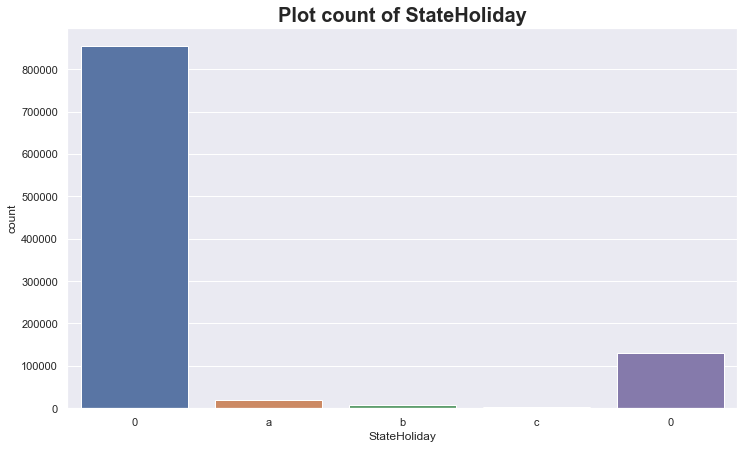

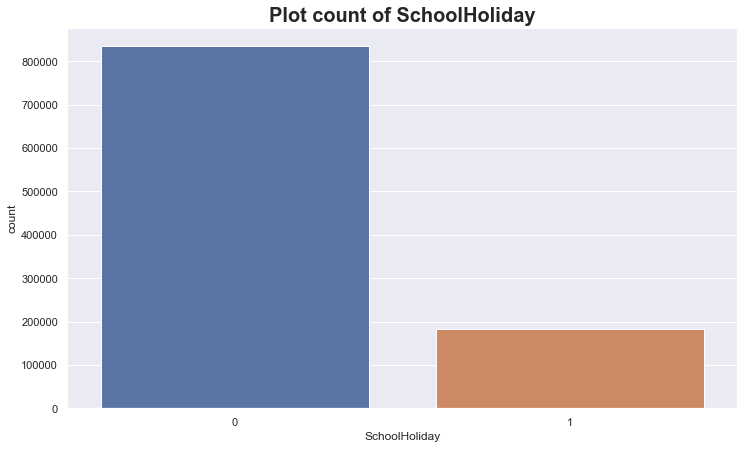

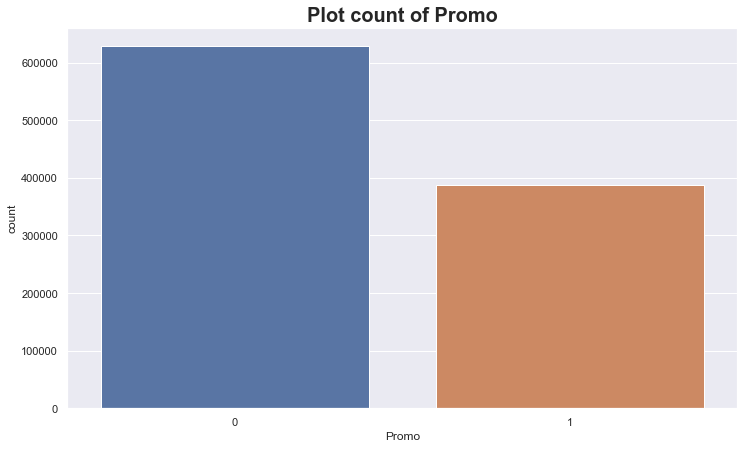

In [69]:
plotfunction.plot_count(clean_trainScore_df, 'StateHoliday')
plotfunction.plot_count(clean_trainScore_df, 'SchoolHoliday')
plotfunction.plot_count(clean_trainScore_df, 'Promo')

**Store distribution**

<Figure size 648x504 with 0 Axes>

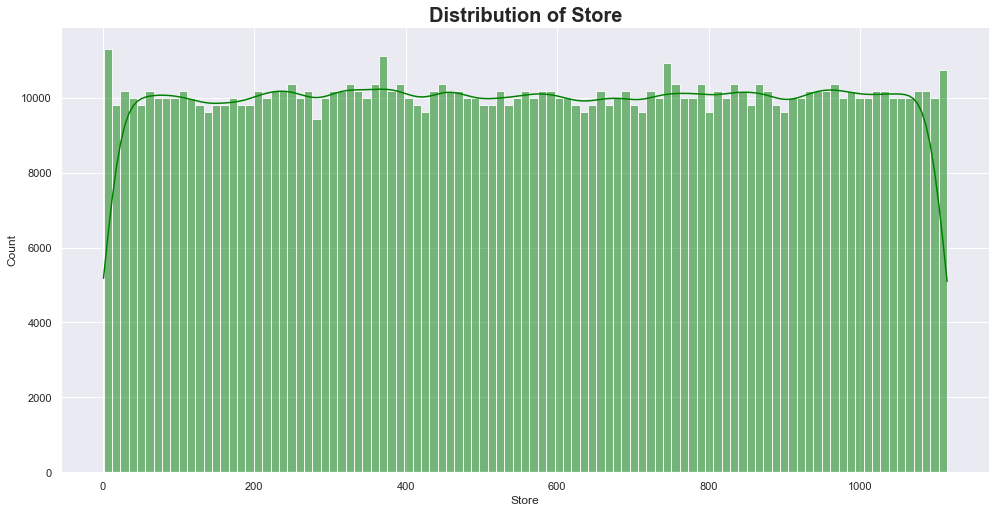

In [70]:
# using plot function
plotfunction.plot_hist(clean_trainScore_df, 'Store', 'green')

**Year, Month & WeekOfYear distribution**

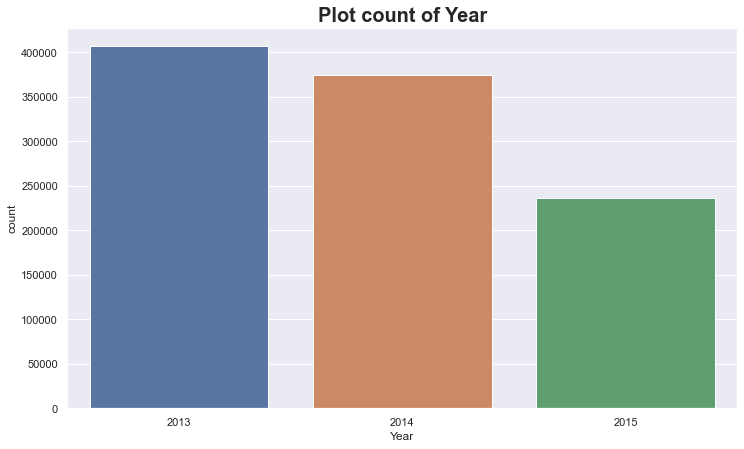

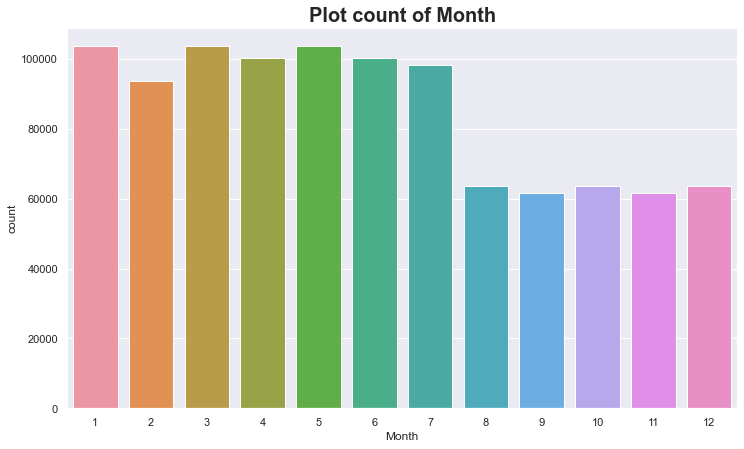

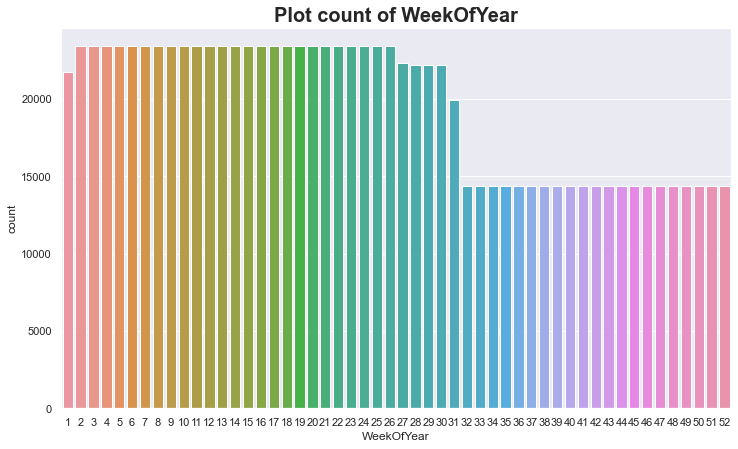

In [71]:
plotfunction.plot_count(clean_trainScore_df, 'Year')
plotfunction.plot_count(clean_trainScore_df, 'Month')
plotfunction.plot_count(clean_trainScore_df, 'WeekOfYear')


 **StoreType, Assortment and Promo2 distribution**

In [72]:
# copying for simplicity
cleanData = clean_trainScore_df.copy()

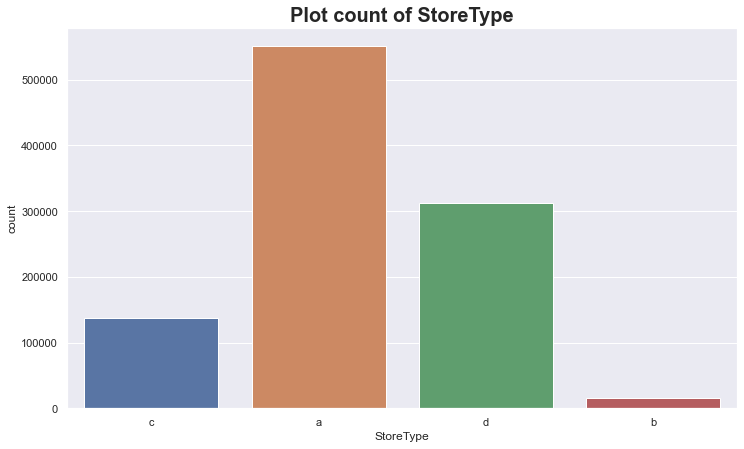

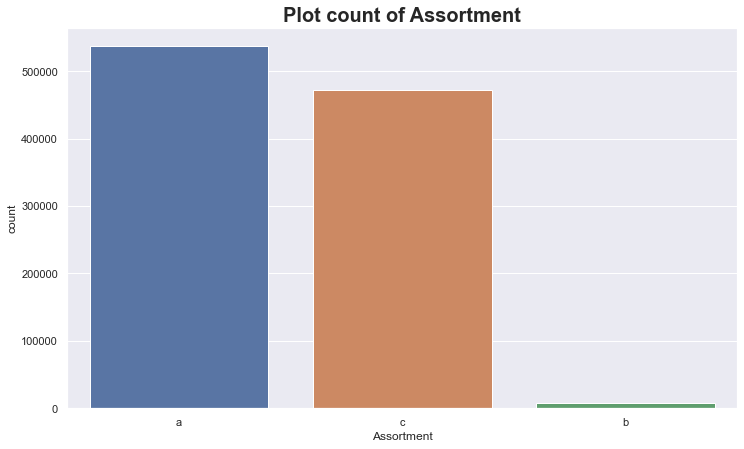

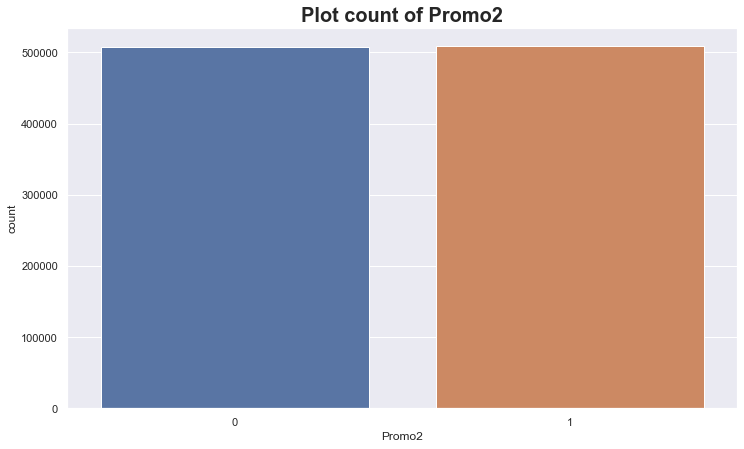

In [73]:
plotfunction.plot_count(cleanData, 'StoreType')
plotfunction.plot_count(cleanData, 'Assortment')
plotfunction.plot_count(cleanData, 'Promo2')

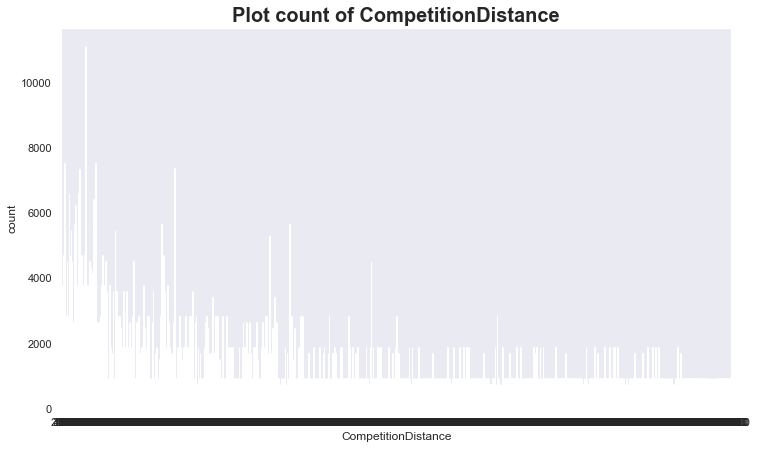

In [74]:
sns.set(style="dark")
plotfunction.plot_count(cleanData, 'CompetitionDistance')

Text(0.5, 1.0, 'Customers Distribution')

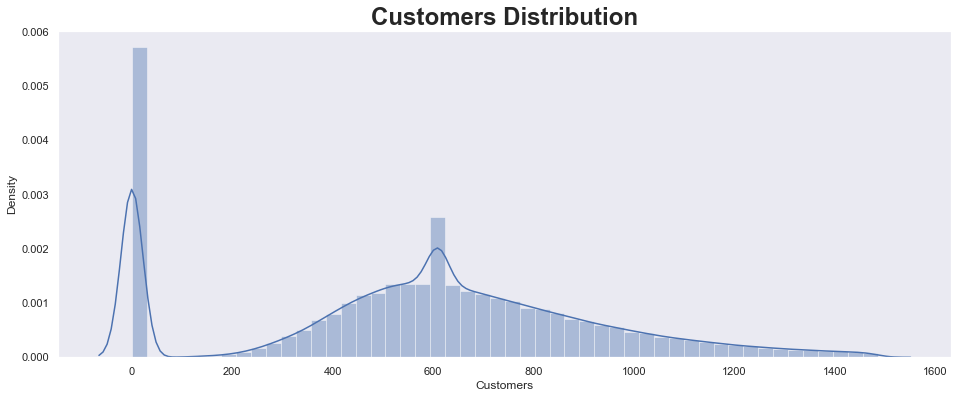

In [75]:
plt.figure(figsize=(16, 6))
sns.distplot(cleanData['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

Text(0.5, 1.0, 'Sales Distribution')

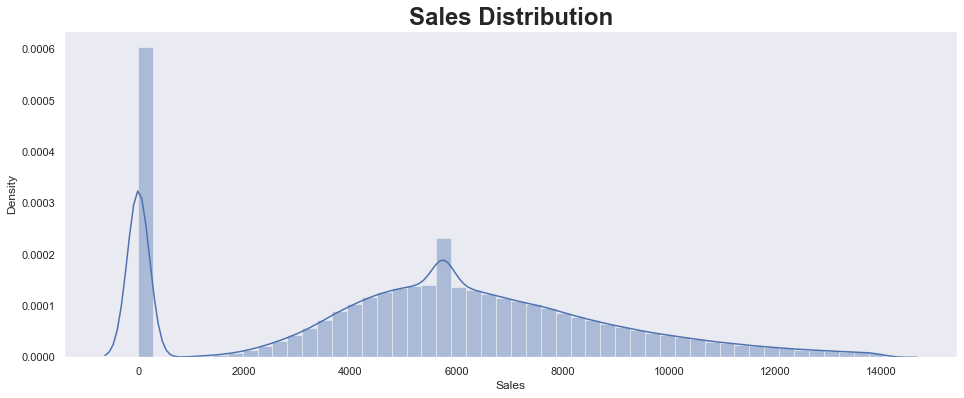

In [76]:
plt.figure(figsize=(16, 6))
sns.distplot(cleanData['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

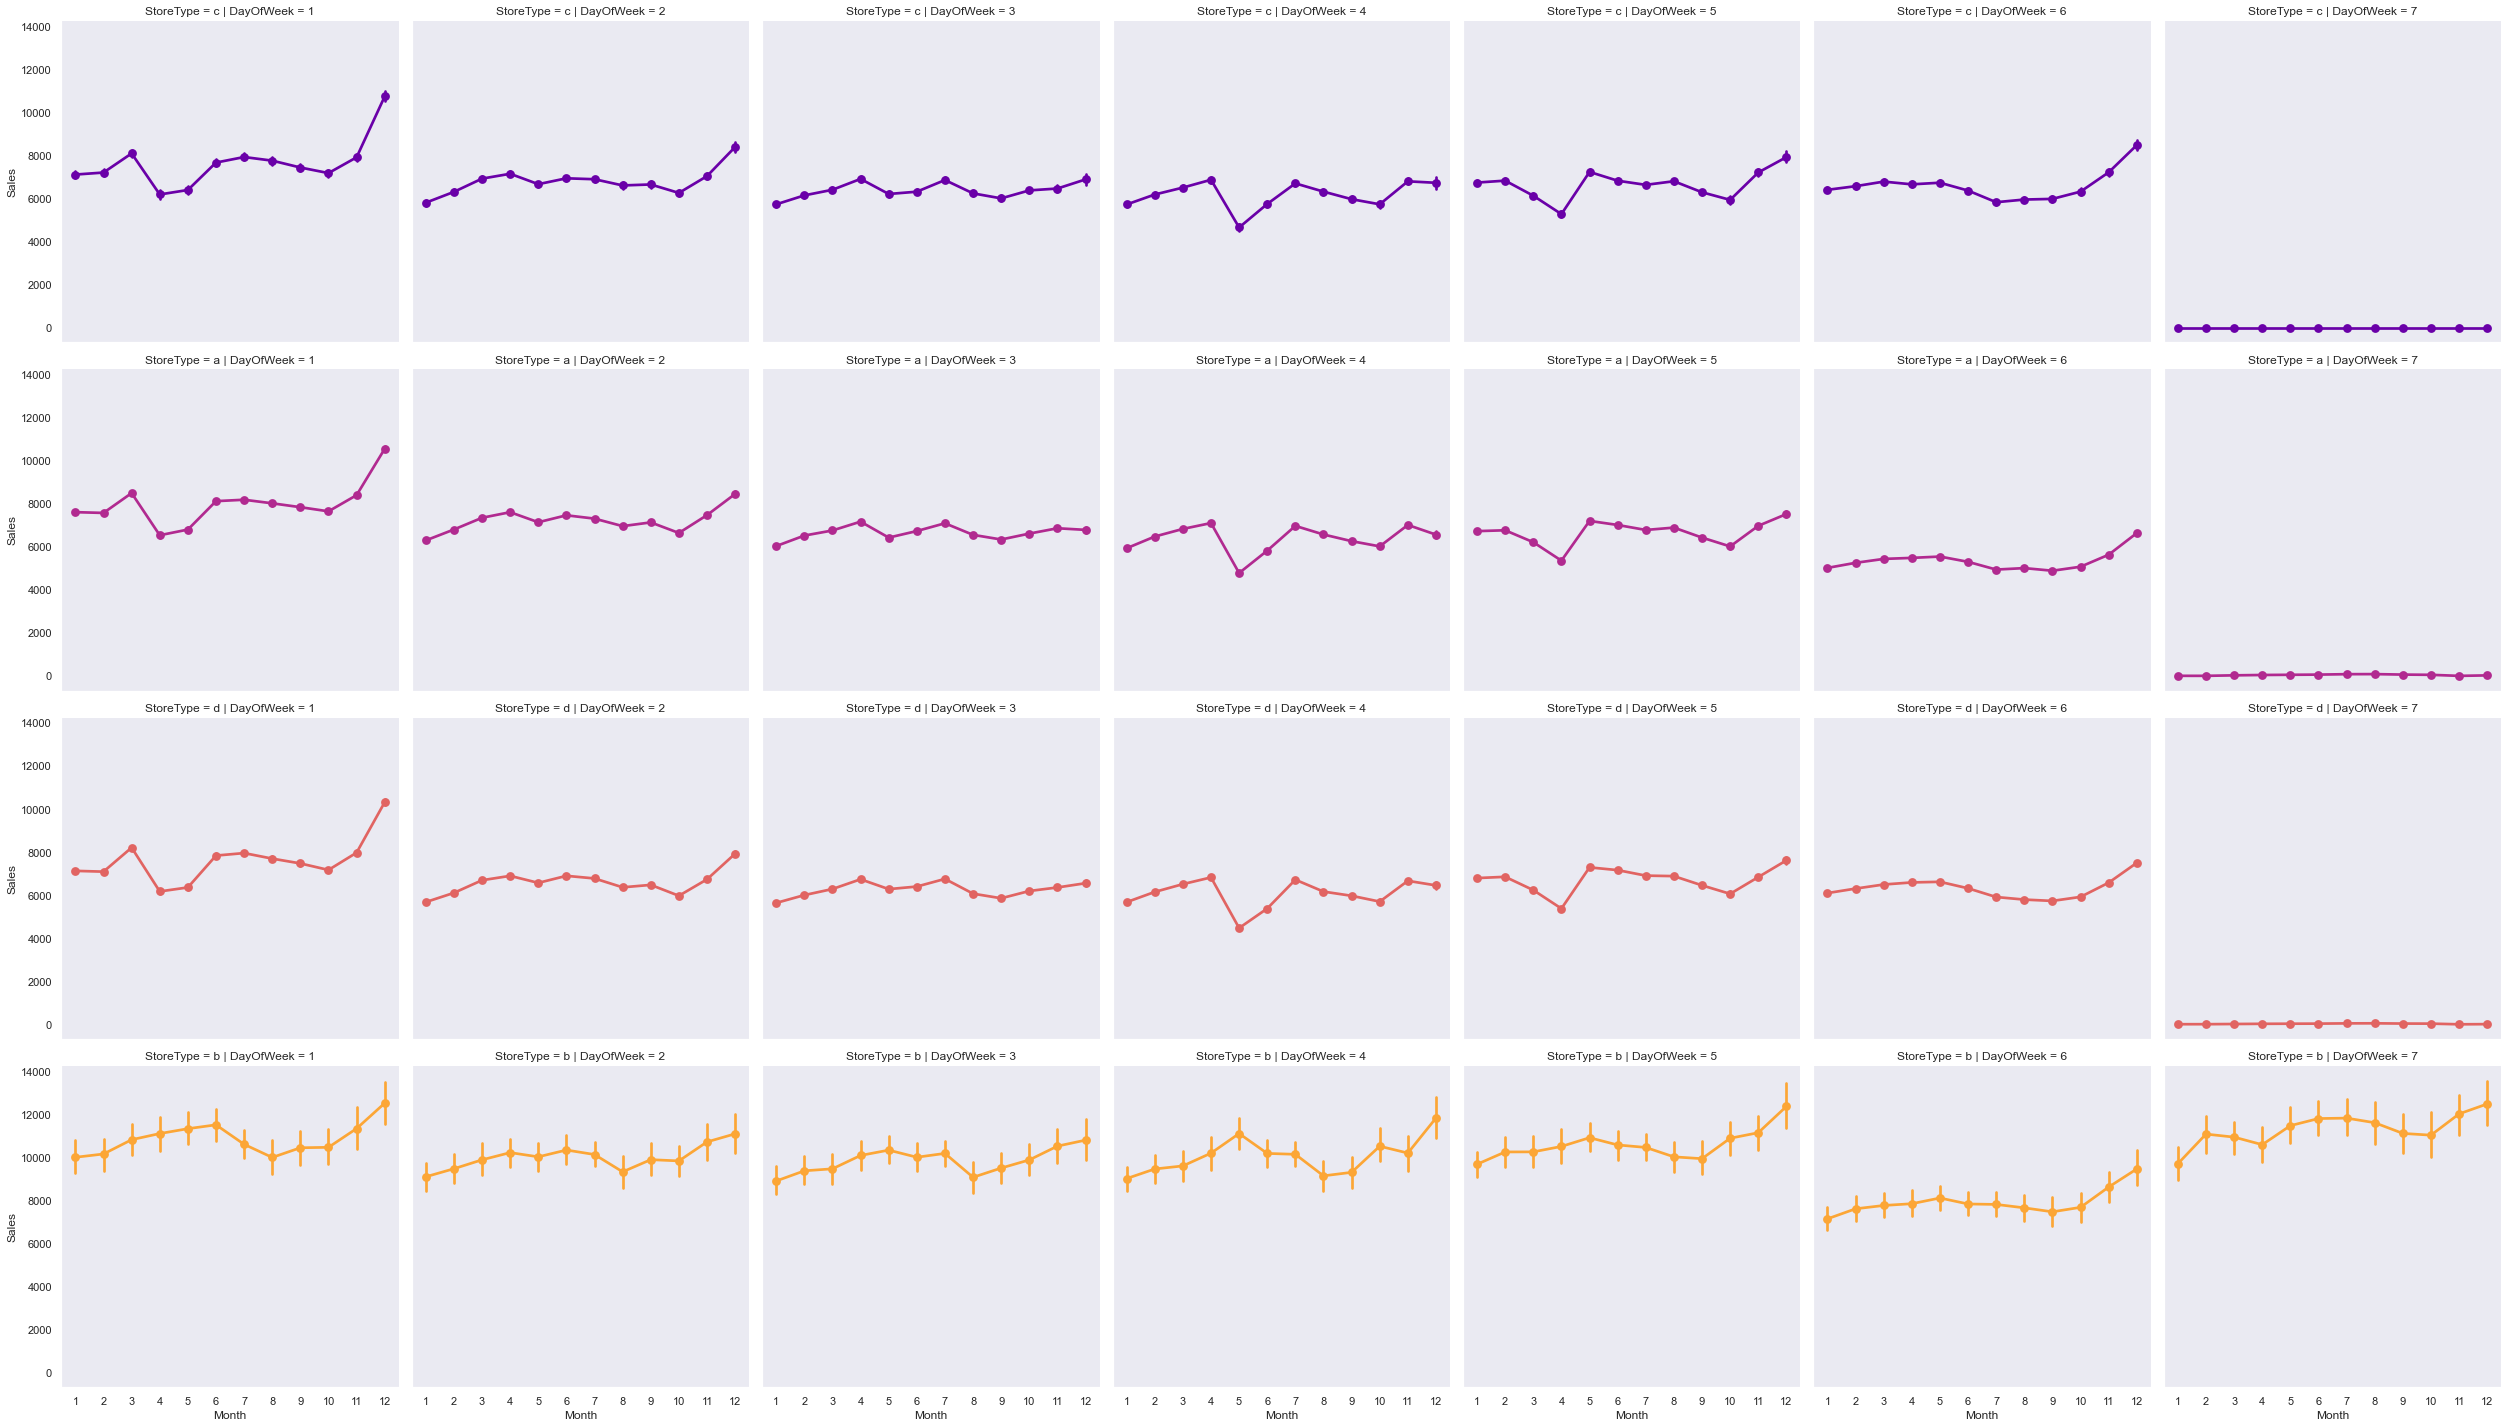

In [88]:
c="blue"
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               color = c) 

__Feature Engeneering__

Generating new features from already existing features.

In [77]:
#Adding salespercustomer column
cleanData['SalesperCustomer']=cleanData['Sales']/cleanData['Customers']

In [78]:
cleanData.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


### correlation Analysis

In [79]:
df_correlation=cleanData[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year',
       'StateHoliday', 'Assortment', 'StoreType',
       'PromoInterval']]


<AxesSubplot:>

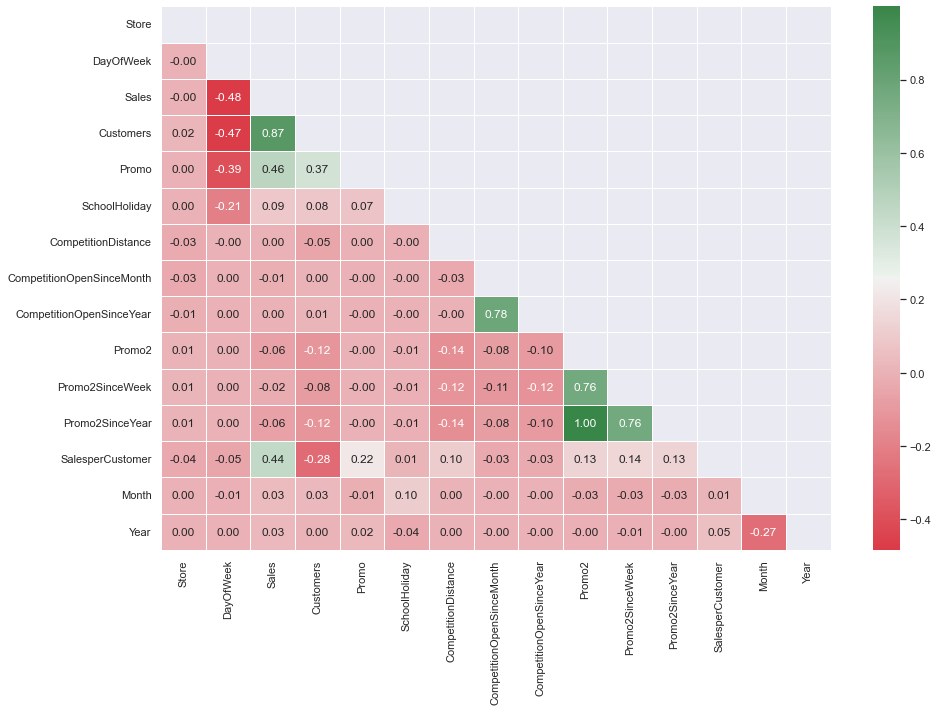

In [80]:
upper_triangle = np.zeros_like(df_correlation.corr(), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_correlation.corr(),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5,cmap=sns.diverging_palette(10, 133, as_cmap=True))


In [81]:
cleanData.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


-Since the competition variables CompetitionOpenSinceYear and CompeitionOpenSinceMonth have the same underlying meaning, merging them into one variable that we call CompetitionOpenSince makes easier for the algorithm to understand the pattern and creates less branches and thus complex trees.

In [82]:
cleanData['CompetitionOpenSince'] = np.where((cleanData['CompetitionOpenSinceMonth']==0) & 
                                                  (cleanData['CompetitionOpenSinceYear']==0) , 0,
                                                  (cleanData.Month - cleanData.CompetitionOpenSinceMonth) 
                                                  + (12 * (cleanData.Year - cleanData.CompetitionOpenSinceYear)) )

In [83]:
del cleanData['CompetitionOpenSinceYear']
del cleanData['CompetitionOpenSinceMonth']

In [84]:
cleanData.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,CompetitionOpenSince
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,0,0.0,0.0,0,9.482883,82.0
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,0,0.0,0.0,0,9.194139,82.0
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,0,0.0,0.0,0,9.143403,82.0
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,0,0.0,0.0,0,8.948214,82.0
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,0,0.0,0.0,0,9.970588,82.0


In [87]:
# saving
Version_one = "../data/train.csv"
helper.save_csv(cleanData, Version_one)

File Successfully Saved.!!!


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,CompetitionOpenSince
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,0,0.0,0.0,0,9.482883,82.0
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,0,0.0,0.0,0,9.194139,82.0
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,0,0.0,0.0,0,9.143403,82.0
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,0,0.0,0.0,0,8.948214,82.0
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,0,0.0,0.0,0,9.970588,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771.0,339.0,1,0,0,1,2013,1,...,2013-01-05,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",14.073746,0.0
1017205,1115,5,4540.0,326.0,1,0,0,1,2013,1,...,2013-01-04,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",13.926380,0.0
1017206,1115,4,4297.0,300.0,1,0,0,1,2013,1,...,2013-01-03,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",14.323333,0.0
1017207,1115,3,3697.0,305.0,1,0,0,1,2013,1,...,2013-01-02,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",12.121311,0.0


 **Data Scaling and Data Encoding**

In [21]:
#train_df = get_data('train_v1')

In [22]:

class CleanTrainTestData:
    """
        this is a dataframe used to clean a dataframe
    """
    
    def __init__(self):
        pass
    
    def drop_closed_stores(self, df):
        
        try:
            cleaned = df.query("Open == 1")
            return cleaned
        except:
            pass
        
    def convert_to_datatime(self, df):  
        try:
            df['Date'] = pd.to_datetime(train_df['Date'])
            return df
        except:
            pass
    
    def sort_by_date(self, df):
        return df.sort_values(by=["Date"], ascending=False)
    
    def to_str(self, df):
        df['StateHoliday'] = df['StateHoliday'].astype(str)
        return df
    
    
    """Extracts Day Month and Year from Date"""
    def transform_date(self, df):
        
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = pd.DatetimeIndex(df['Date']).year
        df['Month'] = pd.DatetimeIndex(df['Date']).month
        df['Day'] = pd.DatetimeIndex(df['Date']).day
        return df

In [23]:

cleaner = CleanTrainTestData()
cleaned_train_df = cleaner.transform_date(train_df)
cleaned_train_df = cleaner.sort_by_date(cleaned_train_df)
cleaned_train_df = cleaner.to_str(cleaned_train_df)


display(cleaned_train_df)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
742,743,5,2015-07-31,5085,501,1,1,0,1,2015,7,31
748,749,5,2015-07-31,6612,716,1,1,0,1,2015,7,31
747,748,5,2015-07-31,7481,578,1,1,0,1,2015,7,31
746,747,5,2015-07-31,10708,826,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1016471,377,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016472,378,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016473,379,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016474,380,2,2013-01-01,0,0,0,0,a,1,2013,1,1
